# Space Debris Regression and Classification:
This Notebook explores a dataset consisting of space debris collected from Star-Track.org.
The dataset consists information of various objects documented. The goal of this notebook is to train a machine learning model to predict the orbit decay date of a space object. The second goal is to train a model to classify if an object's radar cross section (RCS) is small medium or large. Testing multiple machine learning algorithms, it was determined that the Random Forest Regressor had the higest training and test accuracy of 98% and 67%, respectivly. As for the classification, the K-Nearest Neighbors classifier performed the best out of the other models with a training and test score of 70% and 68%, respectivly.  The regression model does suffer from overfitting and additional feature engineering is required to furtuer improve the train test accuracy.

In [48]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import json
%matplotlib inline


In [49]:
dataset = pd.read_json('satcat100k.json')

In [50]:
dataset.head()

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,2021-017BN,47782,ROCKET BODY,FALCON 9 R/B,US,2021-03-04,AFETR,2021-03-26,87.28,53.03,...,0,LARGE,7634,2021,17,BN,Y,FALCON 9 R/B,2021-017BN,47782
1,2020-063C,46391,DEBRIS,CZ-2F DEB,PRC,2020-09-04,JSC,2021-03-24,88.41,49.88,...,0,SMALL,7633,2020,63,C,Y,CZ-2F DEB,2020-063C,46391
2,2020-006BF,45097,PAYLOAD,STARLINK-1175,US,2020-01-29,AFETR,2021-03-19,88.00,52.96,...,0,LARGE,7631,2020,6,BF,Y,STARLINK-1175,2020-006BF,45097
3,1998-067QB,44304,DEBRIS,ISS DEB,CIS,1998-11-20,TTMTR,2021-03-18,87.97,51.62,...,0,MEDIUM,7632,1998,67,QB,Y,ISS DEB,1998-067QB,44304
4,1993-036BTE,38214,DEBRIS,COSMOS 2251 DEB,CIS,1993-06-16,PKMTR,2021-03-16,91.94,74.02,...,0,SMALL,7633,1993,36,BTE,Y,COSMOS 2251 DEB,1993-036BTE,38214


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47968 entries, 0 to 47967
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INTLDES        47968 non-null  object 
 1   NORAD_CAT_ID   47968 non-null  int64  
 2   OBJECT_TYPE    47968 non-null  object 
 3   SATNAME        47968 non-null  object 
 4   COUNTRY        47968 non-null  object 
 5   LAUNCH         47968 non-null  object 
 6   SITE           47968 non-null  object 
 7   DECAY          25355 non-null  object 
 8   PERIOD         47063 non-null  float64
 9   INCLINATION    47063 non-null  float64
 10  APOGEE         47063 non-null  float64
 11  PERIGEE        47063 non-null  float64
 12  COMMENT        891 non-null    object 
 13  COMMENTCODE    2689 non-null   float64
 14  RCSVALUE       47968 non-null  int64  
 15  RCS_SIZE       37931 non-null  object 
 16  FILE           47968 non-null  int64  
 17  LAUNCH_YEAR    47968 non-null  int64  
 18  LAUNCH

In [52]:
dataset.describe()

,NORAD_CAT_ID,PERIOD,INCLINATION,APOGEE,PERIGEE,COMMENTCODE,RCSVALUE,FILE,LAUNCH_YEAR,LAUNCH_NUM,OBJECT_NUMBER
count,47968.000000,47063.000000,47063.000000,47063.000000,47063.000000,2689.000000,47968.0,47968.000000,47968.000000,47968.000000,47968.000000
mean,23984.501668,192.887099,69.597977,4190.485456,1993.158660,3.584976,0.0,5625.967624,1990.028936,47.810353,23984.501668
std,13847.316082,692.621308,25.430927,14201.356898,7060.192735,1.422454,0.0,3193.938453,16.081892,29.939163,13847.316082
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1957.000000,0.000000,1.000000
25%,11992.750000,89.240000,53.050000,269.000000,191.000000,3.000000,0.0,5942.000000,1977.000000,25.000000,11992.750000
50%,23984.500000,94.490000,71.280000,538.000000,380.000000,3.000000,0.0,7337.000000,1990.000000,42.000000,23984.500000
75%,35976.250000,103.170000,96.875000,1005.000000,760.000000,5.000000,0.0,7631.000000,1999.000000,70.000000,35976.250000
max,47976.000000,95687.680000,150.940000,672548.000000,265679.000000,5.000000,0.0,7634.000000,2021.000000,129.000000,47976.000000


# Lets do some data explorartion

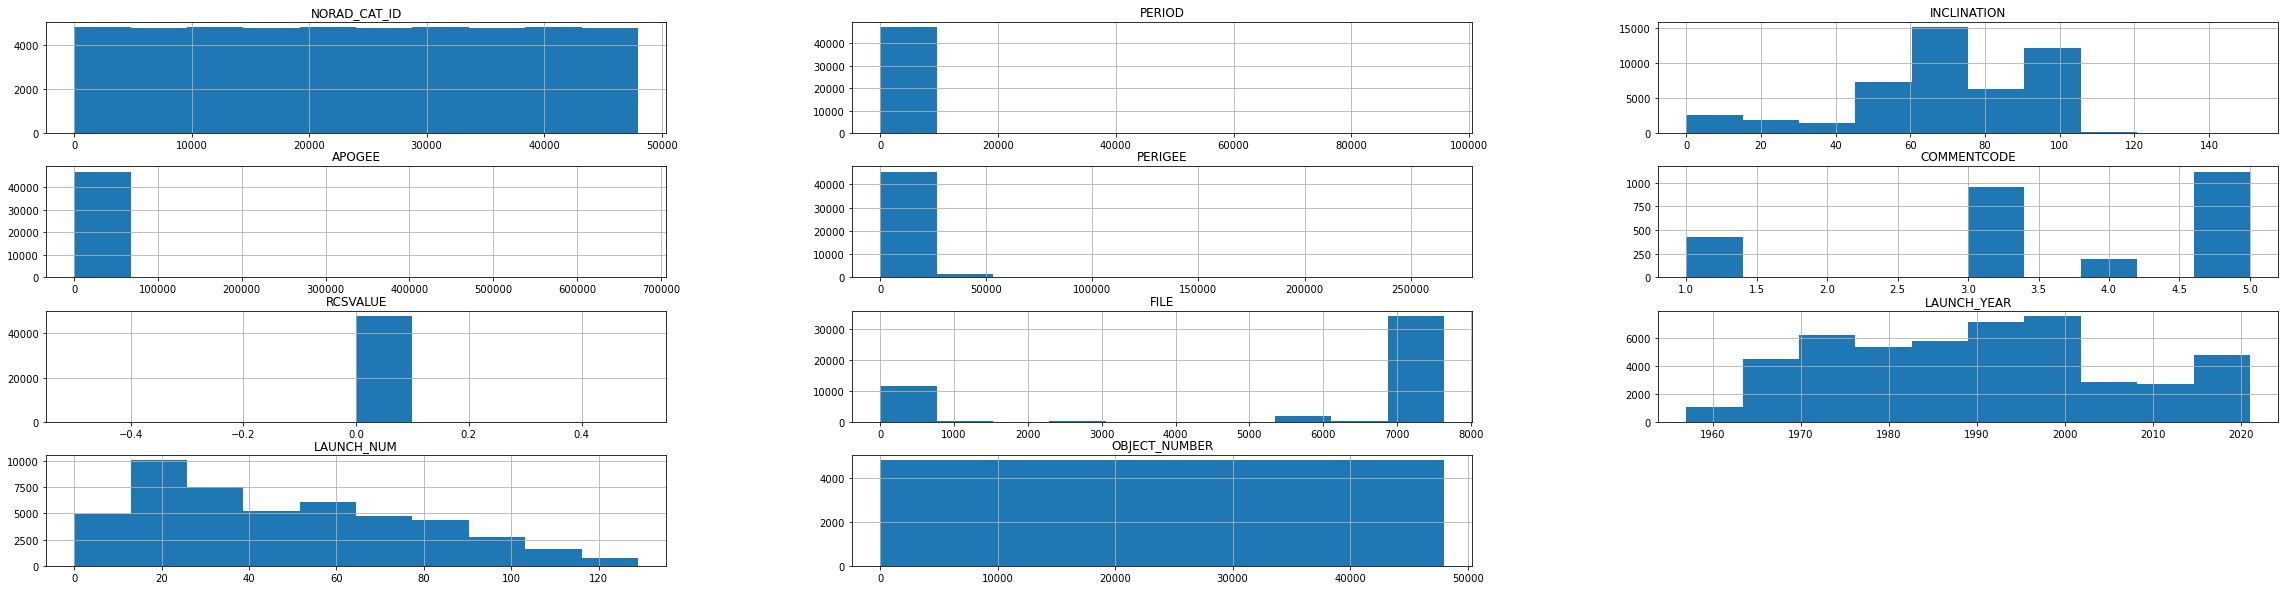

In [53]:
dataset.hist(figsize=(40,10))
plt.show()

In [54]:
corr_mat = dataset.corr()

## Which Countries have the most reported objects?

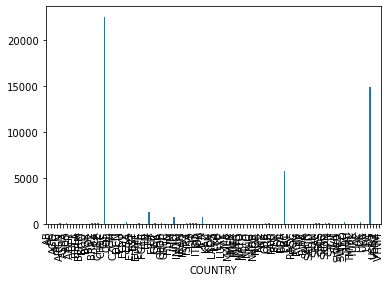

In [55]:
dfcountry = dataset.groupby(['COUNTRY'])['COUNTRY'].count()
dfcountry.plot(kind='bar')
plt.rcParams['figure.figsize'] = (50, 5)

In [56]:
dataset['COUNTRY'].value_counts()

CIS     22604
US      14872
PRC      5759
FR       1327
JPN       710
        ...  
CRI         1
NPL         1
BERM        1
GHA         1
BOL         1
Name: COUNTRY, Length: 106, dtype: int64

Looking at the figure above, the Commenwealth of Independent states (CIS), US, and PRC respectivly, have the most reported objects.

<AxesSubplot:xlabel='OBJECT_TYPE'>

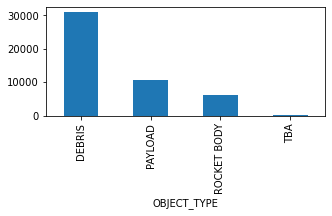

In [57]:
dfobjects = dataset.groupby(['OBJECT_TYPE'])['OBJECT_TYPE'].count()
dfobjects.plot(kind='bar', figsize=(5,2))

## Let's get a breakdown of the objects

In [58]:
dataset['OBJECT_TYPE'].value_counts()

DEBRIS         30974
PAYLOAD        10559
ROCKET BODY     6228
TBA              207
Name: OBJECT_TYPE, dtype: int64

<AxesSubplot:xlabel='RCS_SIZE'>

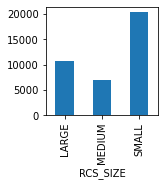

In [59]:
dfobjects = dataset.groupby(['RCS_SIZE'])['RCS_SIZE'].count()
dfobjects.plot(kind='bar', figsize=(2,2))

It looks like most of the objects are small and debris, which may pose issue with navigating around the debris for spacecraft.

# Lets see if we can gain some insights on the data by clustering

In [60]:
dataset['LAUNCH_PIECE'].value_counts()

A      5665
B      5346
C      3408
D      2641
E      1865
       ... 
DJX       1
EAA       1
DVH       1
ECG       1
BYS       1
Name: LAUNCH_PIECE, Length: 3533, dtype: int64

In [61]:
dataset['SITE'].value_counts()

TTMTR    12192
PKMTR    11523
AFWTR     7527
AFETR     5883
TSC       4608
FRGUI     1911
SRI       1017
JSC        651
XSC        614
TNSTA      465
KYMTR      404
WLPIS      233
KSCUT      157
RLLC       137
OREN       115
VOSTO      113
SEAL        69
ERAS        62
WRAS        57
HGSTR       48
WSC         39
YSLA        26
SVOB        20
YAVNE       19
KODAK       19
SNMLP       17
SADOL       11
SEM          8
KWAJL        7
YUN          6
WOMRA        4
CAS          2
SMTS         2
NSC          2
Name: SITE, dtype: int64

In [62]:
dataset['DECAY'].value_counts()

1976-08-02    150
1973-05-07     93
1975-09-09     75
1976-08-05     52
1977-01-20     47
             ... 
2009-11-17      1
1983-07-31      1
2009-12-08      1
2005-09-18      1
1986-05-04      1
Name: DECAY, Length: 13211, dtype: int64

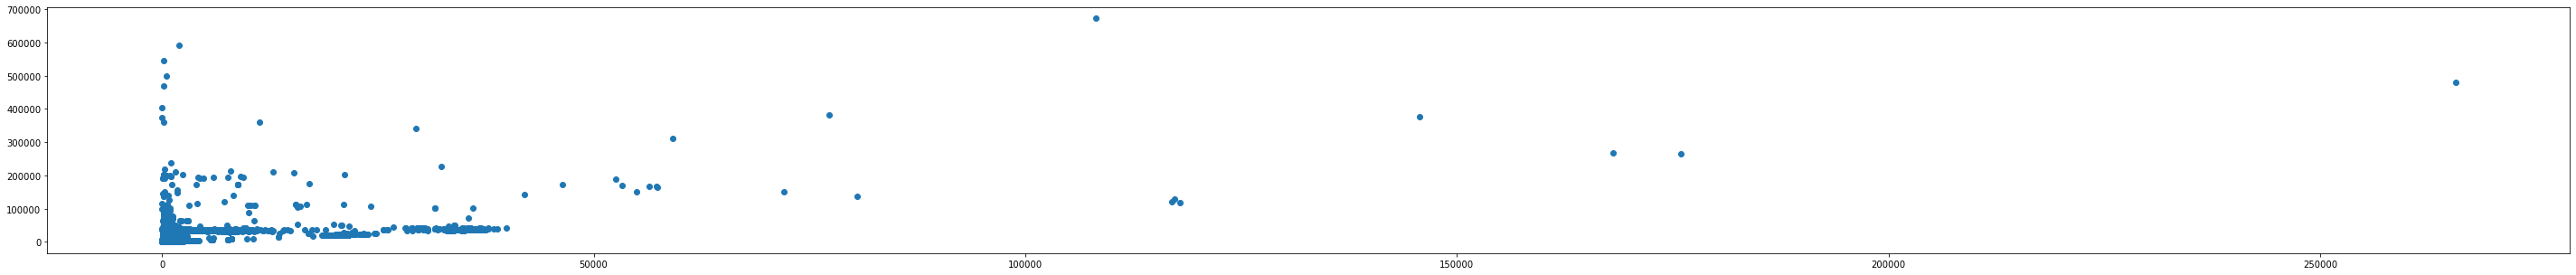

In [63]:
plt.scatter(dataset['PERIGEE'], dataset['APOGEE'])

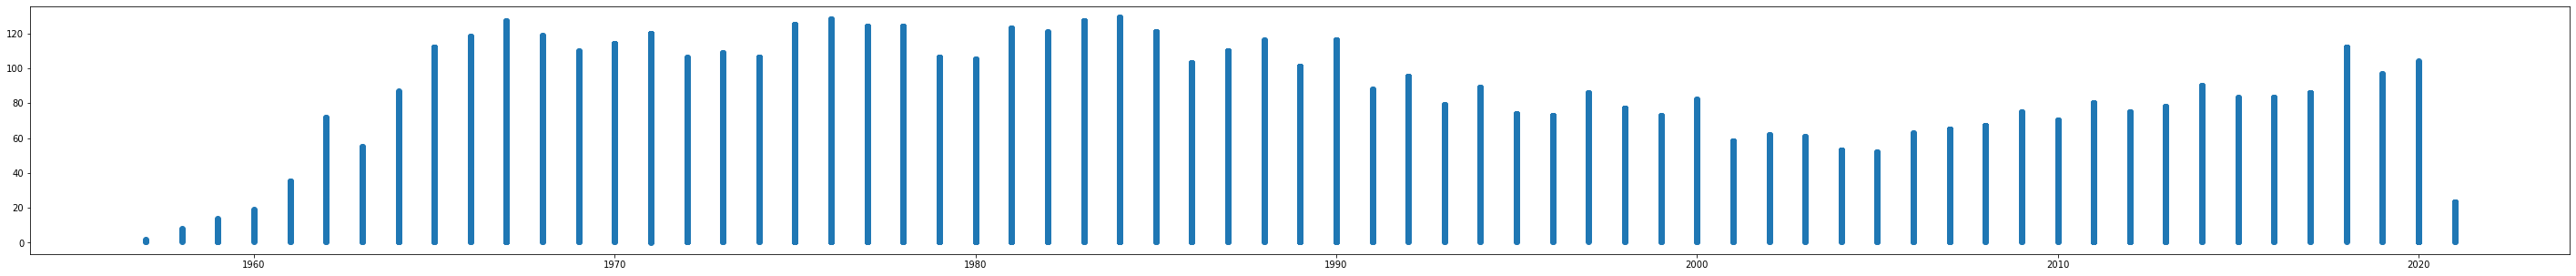

In [64]:
plt.scatter(dataset['LAUNCH_YEAR'],dataset['LAUNCH_NUM'])

# TIme to prepare the dataset and do some trimming

In [65]:
# drop some the columns that have no values or may not be relevant
df = dataset.drop(['NORAD_CAT_ID','COMMENT','COMMENTCODE','RCSVALUE','FILE','LAUNCH_NUM'], axis=1)
df['OBJECT_TYPE'].dropna(inplace=True)
df.dropna(inplace=True)
df.dropna()
df.head()

,INTLDES,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,LAUNCH_YEAR,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,2021-017BN,ROCKET BODY,FALCON 9 R/B,US,2021-03-04,AFETR,2021-03-26,87.28,53.03,144.0,135.0,LARGE,2021,BN,Y,FALCON 9 R/B,2021-017BN,47782
1,2020-063C,DEBRIS,CZ-2F DEB,PRC,2020-09-04,JSC,2021-03-24,88.41,49.88,201.0,191.0,SMALL,2020,C,Y,CZ-2F DEB,2020-063C,46391
2,2020-006BF,PAYLOAD,STARLINK-1175,US,2020-01-29,AFETR,2021-03-19,88.00,52.96,183.0,169.0,LARGE,2020,BF,Y,STARLINK-1175,2020-006BF,45097
3,1998-067QB,DEBRIS,ISS DEB,CIS,1998-11-20,TTMTR,2021-03-18,87.97,51.62,178.0,169.0,MEDIUM,1998,QB,Y,ISS DEB,1998-067QB,44304
4,1993-036BTE,DEBRIS,COSMOS 2251 DEB,CIS,1993-06-16,PKMTR,2021-03-16,91.94,74.02,380.0,359.0,SMALL,1993,BTE,Y,COSMOS 2251 DEB,1993-036BTE,38214


In [66]:
# Lets attempt to cluster the objects based on the apogee and perigee

In [67]:
# We can train a model to predict when an object will Decay (Regression, SVM, Decision Trees)
# Use the size, period, inclination, etc. to predict the object type

In [68]:
# Get the numerical values
debris_num = dataset.drop(['NORAD_CAT_ID','INTLDES', 'OBJECT_TYPE', 'SATNAME', 'COUNTRY', 'LAUNCH', 'SITE',
       'RCS_SIZE', 'LAUNCH_PIECE','COMMENT','COMMENTCODE','FILE','LAUNCH_NUM', 'CURRENT', 'OBJECT_NAME', 'OBJECT_ID',
       'OBJECT_NUMBER', 'RCSVALUE','DECAY'], axis=1)
debris_num.dropna(inplace=True)
debris_num.head()

,PERIOD,INCLINATION,APOGEE,PERIGEE,LAUNCH_YEAR
0,87.28,53.03,144.0,135.0,2021
1,88.41,49.88,201.0,191.0,2020
2,88.00,52.96,183.0,169.0,2020
3,87.97,51.62,178.0,169.0,1998
4,91.94,74.02,380.0,359.0,1993


In [69]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
launch = pd.to_datetime(debris_num['LAUNCH_YEAR'], format='%Y').apply(lambda x: x.toordinal())
ap = np.array(debris_num['APOGEE']).reshape(-1,1)
ap = std_sc.fit_transform(ap)
pe = np.array(debris_num['PERIGEE']).reshape(-1,1)
pe = std_sc.fit_transform(pe)
inc = np.array(debris_num['INCLINATION']).reshape(-1,1)
inc = std_sc.fit_transform(inc)
per = np.array(debris_num['PERIOD']).reshape(-1,1)
per = std_sc.fit_transform(per)
# reg = len(np.concatenate([per, inc, pe, ap], axis=1))
debris_reg = pd.concat([pd.DataFrame(per, columns=['PERIOD']), pd.DataFrame(inc, columns=['INCLINATION']), 
                 pd.DataFrame(pe, columns=['PERIGEE']), pd.DataFrame(ap, columns=['APOGEE']), pd.DataFrame(launch)], axis=1)

In [70]:
# one hot encode the RCS size
from sklearn.preprocessing import OneHotEncoder
rcs_cat = dataset['RCS_SIZE']
obj_cat = dataset['OBJECT_TYPE']
obj_onehot = pd.get_dummies(obj_cat)
rcs_onehot = pd.get_dummies(rcs_cat)
encoded = pd.concat([obj_onehot, rcs_onehot], axis=1)
encoded.head()

,DEBRIS,PAYLOAD,ROCKET BODY,TBA,LARGE,MEDIUM,SMALL
0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,1
2,0,1,0,0,1,0,0
3,1,0,0,0,0,1,0
4,1,0,0,0,0,0,1


In [71]:
#Format target labels
labels = pd.to_datetime(df['DECAY']).apply(lambda x: x.toordinal())

In [72]:
#Combine the categorical and numerical data and drop the NaN rows
debris_set = pd.concat([debris_reg, encoded, labels], axis=1)
debris_set_prepared = debris_set.dropna()
debris_set_prepared

,PERIOD,INCLINATION,PERIGEE,APOGEE,LAUNCH_YEAR,DEBRIS,PAYLOAD,ROCKET BODY,TBA,LARGE,MEDIUM,SMALL,DECAY
0,-0.152476,-0.651496,-0.263191,-0.284940,737791.0,0,0,1,0,1,0,0,737875.0
1,-0.150845,-0.775362,-0.255259,-0.280926,737425.0,1,0,0,0,0,0,1,737873.0
2,-0.151437,-0.654249,-0.258375,-0.282193,737425.0,0,1,0,0,1,0,0,737868.0
3,-0.151480,-0.706941,-0.258375,-0.282545,729390.0,1,0,0,0,0,1,0,737867.0
4,-0.145748,0.173886,-0.231463,-0.268321,727564.0,1,0,0,0,0,0,1,737865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25206,39.749651,-1.797751,-0.010787,41.405322,716241.0,0,0,1,0,0,0,1,716466.0
25294,0.810802,-1.711634,-0.190954,2.627489,715145.0,0,0,1,0,0,0,1,716056.0
25338,-0.131844,1.165209,-0.166309,-0.235437,714780.0,0,1,0,0,1,0,0,715606.0
25352,-0.123788,-1.736014,-0.254551,-0.154669,714415.0,0,1,0,0,0,0,1,714883.0


In [73]:
# Split the data
from sklearn.model_selection import train_test_split
y = debris_set_prepared.pop('DECAY')
x_train, x_test, y_train, y_test = train_test_split(debris_set_prepared, y, test_size=.3, random_state=42)

In [74]:
# import the metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score

In [75]:
# show scores
def disp_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'std: {scores.std()}')

In [76]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=25, random_state=42)
forest_reg.fit(x_train, y_train)
# forest_reg = RandomForestRegressor()
# params = [
#     {'n_estimators': [1, 5, 10, 15,20,25,30]}
# ]
# gscv = GridSearchCV(forest_reg, params, cv=5, return_train_score=True)
# gscv.fit(x_train, y_train)
# print(gscv.best_params_)
# print(gscv.best_score_)

print(f'train: {forest_reg.score(x_train, y_train)}')
print(f'test: {forest_reg.score(x_test, y_test)}')

train: 0.964490367139718
test: 0.7599460817729526


Given that the train is .96 and test is .75, this means that the model is overfitting the training set

In [77]:
score = cross_val_score(forest_reg, x_train, y_train, cv=10)
disp_scores(score)

Scores: [0.77264592 0.76048928 0.76884824 0.74801465 0.77482293 0.76551794
 0.78407755 0.74567245 0.76060089 0.76974056]
Mean: 0.7650430405538885
std: 0.01121690618317919


In [78]:
debris_pred = forest_reg.predict(x_test)
mse = mean_squared_error(y_test, debris_pred)
mse = np.sqrt(mse)
mse

2245.8226915250098

In [79]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),random_state=0, n_estimators=100)
ada.fit(x_train, y_train)
predict = ada.predict(x_test)
print(f'training: {ada.score(x_train, y_train)}')
print(f'test: {ada.score(x_test, y_test)}')

training: 0.8608804119020333
test: 0.7236768615807839


In [80]:
# Try ridge regression and SVR next to see if can get better performance
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [81]:
ridge = Ridge()
params = [
    {'alpha': [.1, .3, .6, 1]}
]
gscv = GridSearchCV(ridge, params, cv=5, return_train_score=True)
gscv.fit(x_train, y_train)
print(gscv.best_params_)
print(gscv.best_score_)

{'alpha': 1}
0.6011329128935234


In [82]:
kneighreg = KNeighborsRegressor()
# lets do a gridsearch to try different hyperparameters
params = [
    {'n_neighbors': [1, 3, 6, 10, 15]}
]
gscv = GridSearchCV(kneighreg, params, cv=10, return_train_score=True)
gscv.fit(x_train, y_train)
print(gscv.best_params_)
print(gscv.best_score_)

{'n_neighbors': 15}
0.7397321761929374


From training a various regression models, the model with the best performance is the Random Forest Regressor with a training accuracy of 0.965 and testing accuracy of 0.76. The high training accuracy indicates the model is overfitting the dataset.

In [83]:
# Lets create a model to predict the type of object (debris, rocket body, payload)

In [84]:
# Drop TBA 10 values
df.drop(df[df['OBJECT_TYPE'] == 'TBA'].index, inplace=True)

In [85]:
# Recall that most objects are debris, 
# first, have an equal amt of data for all 3 classes to reduce bias
num_of_med = len(df[df['RCS_SIZE'] == 'MEDIUM'])
small = df[df['RCS_SIZE'] == 'SMALL'][:num_of_med]
large = df[df['RCS_SIZE'] == 'LARGE'][:num_of_med]
med = df[df['RCS_SIZE'] == 'MEDIUM']

,INTLDES,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,LAUNCH_YEAR,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
1,2020-063C,DEBRIS,CZ-2F DEB,PRC,2020-09-04,JSC,2021-03-24,88.41,49.88,201.0,191.0,SMALL,2020,C,Y,CZ-2F DEB,2020-063C,46391
4,1993-036BTE,DEBRIS,COSMOS 2251 DEB,CIS,1993-06-16,PKMTR,2021-03-16,91.94,74.02,380.0,359.0,SMALL,1993,BTE,Y,COSMOS 2251 DEB,1993-036BTE,38214
7,2018-084BK,DEBRIS,H-2A DEB,JPN,2018-10-29,TNSTA,2021-03-14,91.37,97.78,362.0,322.0,SMALL,2018,BK,Y,H-2A DEB,2018-084BK,46222
11,1998-067PW,PAYLOAD,DELPHINI,DEN,1998-11-20,TTMTR,2021-03-14,88.12,51.61,185.0,177.0,SMALL,1998,PW,Y,DELPHINI,1998-067PW,44030
12,1998-067QL,PAYLOAD,SWIATOWID,POL,1998-11-20,TTMTR,2021-03-14,88.25,51.62,192.0,183.0,SMALL,1998,QL,Y,SWIATOWID,1998-067QL,44426


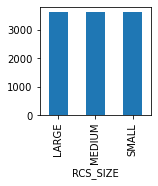

In [86]:
resized_ds = pd.concat([small, large, med])
resized_ds_bar = resized_ds.groupby(['RCS_SIZE'])['RCS_SIZE'].count()
resized_ds_bar.plot(kind='bar', figsize=(2,2))
resized_ds.head()

In [87]:
# Lets prepare the dataset for classification
obj_cat = df['OBJECT_TYPE']
obj_onehot = pd.get_dummies(obj_cat)
encoded_class = obj_onehot

In [88]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
# launch = pd.to_datetime(debris_num['LAUNCH_YEAR'], format='%Y').apply(lambda x: x.toordinal())
# decay = pd.to_datetime(df['DECAY']).apply(lambda x: x.toordinal())

ap = np.array(debris_num['APOGEE']).reshape(-1,1)
ap = std_sc.fit_transform(ap)
pe = np.array(debris_num['PERIGEE']).reshape(-1,1)
pe = std_sc.fit_transform(pe)
inc = np.array(debris_num['INCLINATION']).reshape(-1,1)
inc = std_sc.fit_transform(inc)
per = np.array(debris_num['PERIOD']).reshape(-1,1)
per = std_sc.fit_transform(per)

# reg = len(np.concatenate([per, inc, pe, ap], axis=1))
class_reg = pd.concat([pd.DataFrame(per, columns=['PERIOD']), pd.DataFrame(inc, columns=['INCLINATION']), 
                 pd.DataFrame(pe, columns=['PERIGEE']), pd.DataFrame(ap, columns=['APOGEE'])], axis=1)

In [89]:
class_labels = resized_ds['RCS_SIZE']

In [90]:
#Combine the categorical and numerical data and drop the NaN rows
debris_set_cat = pd.concat([class_reg, encoded_class, class_labels], axis=1)
debris_set_prepared_cat = debris_set_cat.dropna()
debris_set_prepared_cat

,PERIOD,INCLINATION,PERIGEE,APOGEE,DEBRIS,PAYLOAD,ROCKET BODY,RCS_SIZE
0,-0.152476,-0.651496,-0.263191,-0.284940,0.0,0.0,1.0,LARGE
1,-0.150845,-0.775362,-0.255259,-0.280926,1.0,0.0,0.0,SMALL
2,-0.151437,-0.654249,-0.258375,-0.282193,0.0,1.0,0.0,LARGE
3,-0.151480,-0.706941,-0.258375,-0.282545,1.0,0.0,0.0,MEDIUM
4,-0.145748,0.173886,-0.231463,-0.268321,1.0,0.0,0.0,SMALL
...,...,...,...,...,...,...,...,...
24165,-0.148304,-0.533528,-0.252851,-0.269941,1.0,0.0,0.0,MEDIUM
24237,-0.146961,-0.821763,-0.255259,-0.262406,0.0,1.0,0.0,MEDIUM
24424,-0.148895,-0.194961,-0.259933,-0.269237,0.0,0.0,1.0,MEDIUM
25076,0.023293,-0.178838,-0.243928,0.430633,1.0,0.0,0.0,MEDIUM


In [91]:
# Split the data
from sklearn.model_selection import train_test_split
y_class = debris_set_prepared_cat.pop('RCS_SIZE')
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(debris_set_prepared_cat, y_class, test_size=.3, random_state=42)

In [92]:
x_train_class

,PERIOD,INCLINATION,PERIGEE,APOGEE,DEBRIS,PAYLOAD,ROCKET BODY
8256,-0.148289,0.491612,-0.244636,-0.273884,1.0,0.0,0.0
630,-0.152332,0.481388,-0.263049,-0.284235,1.0,0.0,0.0
1322,-0.143669,-1.918078,-0.269281,-0.239591,1.0,0.0,0.0
13469,-0.151133,-0.745870,-0.256817,-0.281560,0.0,1.0,0.0
11133,-0.149964,-0.708121,-0.251010,-0.278743,0.0,1.0,0.0
...,...,...,...,...,...,...,...
7180,-0.147639,1.102686,-0.241803,-0.272194,0.0,0.0,1.0
5708,-0.153039,0.504196,-0.266165,-0.286207,0.0,0.0,1.0
6290,-0.149386,1.092462,-0.248885,-0.277053,0.0,1.0,0.0
899,-0.148809,0.648903,-0.246336,-0.275574,1.0,0.0,0.0


In [93]:
# For classification, use linear SVC, K-nearest neighbors, 
# and ensample methods (Trees, etc.)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [94]:
svc = SVC(gamma='auto')
svc.fit(x_train_class, y_train_class)
print(svc.score(x_train_class, y_train_class))
print(svc.score(x_test_class, y_test_class))

0.6177398160315375
0.6005518087063152


In [106]:
kneighboors = KNeighborsClassifier()

# lets do a gridsearch to try different hyperparameters
params = [
    {'n_neighbors': [1, 3, 6, 10, 15,20]}
]
gscv = GridSearchCV(kneighboors, params, cv=5, return_train_score=True)
gscv.fit(x_train_class, y_train_class)
print(gscv.best_params_)
print(gscv.best_score_)

knclass = KNeighborsClassifier(n_neighbors=10)
knclass.fit(x_train_class, y_train_class)
# print(f'train: {knclass.score(x_train_class, y_train_class)}') 
knclass.score(x_test_class, y_test_class)

{'n_neighbors': 10}
0.7035479632063074


0.6870018393623544

In [96]:
rand_for = RandomForestClassifier(n_estimators=10)
rand_for.fit(x_train_class, y_train_class)
print(rand_for.score(x_train_class, y_train_class))
print(rand_for.score(x_test_class, y_test_class))

0.9773981603153745
0.6425505824647455


In [97]:
# pred_for = rand_for.predict(x_test_class)
# accuracy_score(y_test_class, pred_for)

In [98]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=90)
# adaboost.fit(x_train_class, y_train_class)
# print(adaboost.score(x_train_class, y_train_class))
# print(adaboost.score(x_test_class, y_test_class))

# lets do a gridsearch to try different hyperparameters
params = [
    {'n_estimators': [1, 3, 6, 10,12, 15,20, 25]}
]
gscv = GridSearchCV(adaboost, params, cv=5, return_train_score=True)
gscv.fit(x_train_class, y_train_class)
print(gscv.best_params_)
print(gscv.best_score_)

{'n_estimators': 15}
0.6596583442838371


In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
bag_class = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100,
                             bootstrap=True, n_jobs=1)
# bag_class.fit(x_train_class,y_train_class)

# lets do a gridsearch to try different hyperparameters
params = [
    {'n_estimators': [1, 3, 6, 10, 15,20], 'max_features': [1,2,3,4,5,5]},
    {'bootstrap': [False], 'n_estimators': [1,3,6,10], 'max_features':[1,2,3]}
]
gscv = GridSearchCV(bag_class, params, cv=5, return_train_score=True)
gscv.fit(x_train_class, y_train_class)
print(gscv.best_params_)
print(gscv.best_score_)

{'max_features': 5, 'n_estimators': 20}
0.6507227332457294


In [100]:
# lets do a gridsearch to try different hyperparameters
params = [
    {'n_estimators': [1, 3, 6, 10, 15,20], 'max_features': [1,2,3]},
    {'bootstrap': [False], 'n_estimators': [1,3,6,10], 'max_features':[1,2,3]}
]
forest_class = RandomForestClassifier()
gscv_for = GridSearchCV(forest_class, params, cv=5, return_train_score=True)
gscv_for.fit(x_train_class, y_train_class)
print(gscv_for.best_params_)
print(gscv_for.best_score_)

{'max_features': 3, 'n_estimators': 20}
0.6700394218134034
